Recommended NLP projects: https://github.com/NirantK/awesome-project-ideas


This project is to predict the active power of a single house family. The dataset is [Individual household electric power consumption Data Set](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).


## 1 Data Review

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read txt, and convert it to csv
path = "/content/drive/My Drive/Python/EnergyForecast/household_power_consumption.txt"
df = pd.read_csv(path, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']},  # merge two columns and create a new column
                 infer_datetime_format=True, 
                 na_values=['nan','?'],   # df.replace('?', nan, inplace=True)
                 index_col='dt',  # use 'dt' as the index
                 )

# dataset = pd.read_csv("/content/drive/My Drive/Python/NLP/02_EnergyForecast/household_power_consumption.txt", sep=';', \
#                    header=0, low_memory=False, 
#                    infer_datetime_format=True, 
#                    parse_dates={'datetime':[0,1]}, 
#                    index_col=['datetime'])
# df.isnull()

#date: 日期格式为 dd/mm/yy
# time: 时间格式为 hh:mm:ss
# Global_active_power: 家庭消耗的总有功功率（千瓦），在交流电路中，电源在一个周期内发出瞬时功率的平均值(或负载电阻所消耗的功率)，称为"有功功率"
# Global_reactive_power: 家庭消耗的总无功功率（千瓦），在具有电感或电容的电路中，在每半个周期内，把电源能量变成磁场(或电场)能量贮存起来，然后，再释放，又把贮存的磁场（或电场）能量再返回给电源，只是进行这种能量的交换，并没有真正消耗能量，我们把这个交换的功率值，称为" 无功功率"
# voltage: 平均电压（伏特）
# Global_intensity: 平均电流强度（安培)
# sub_metering_1: 厨房的有功功率
# sub_metering_2: 用于洗衣机等电器的有功功率
# sub_metering_3: 空调热水器等电器的有功功率

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
# find all missing values
total = df.isnull().sum().sort_values(ascending=False)
display(total)

Sub_metering_3           25979
Sub_metering_2           25979
Sub_metering_1           25979
Global_intensity         25979
Voltage                  25979
Global_reactive_power    25979
Global_active_power      25979
dtype: int64

In [ ]:
# use the mean value to fill the missing cells
for j in range(0,7):        
        df.iloc[:,j] = df.iloc[:,j].fillna(df.iloc[:,j].mean())
# check if there are still missing values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# fill missing values with a value at the same time one day ago

from numpy import isnan
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

# fill missing
fill_missing(df.values)

## 2 Data Visualization

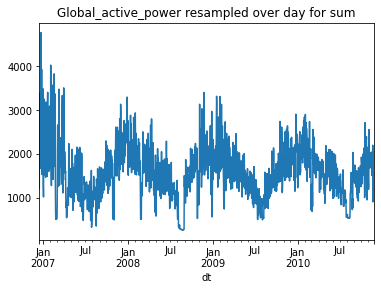

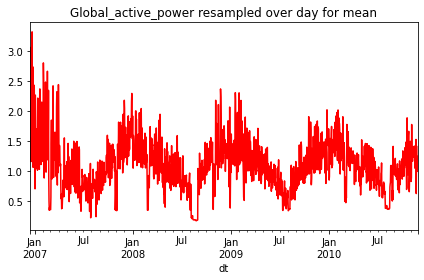

In [ ]:
# 对 Global_active_power 数据按天进行聚合，并比较均值、总和
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
# plt.tight_layout()
plt.show()   


df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


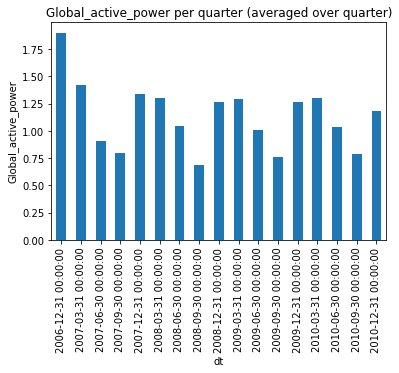

In [ ]:
import matplotlib.dates as mdates

# 对 'Global_active_power' 按季度进行聚合
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
# ax=plt.gca()
# df.index = pd.to_datetime(df.index,format='%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #'%Y-%m-%d %H:%M:%S'
plt.show()
#Q1 & Q4 have the largest power usage, followed by Q2, and then Q3.


# # 对'Voltage' 按月进行聚合
# plt.figure(figsize=(12,6))
# df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
# plt.xticks(rotation=90)
# plt.ylabel('Voltage')
# plt.title('Voltage per quarter (summed over quarter)')
# plt.show()
# # the voltage is around 245. There is no big change over time. So we can ignore this feature.


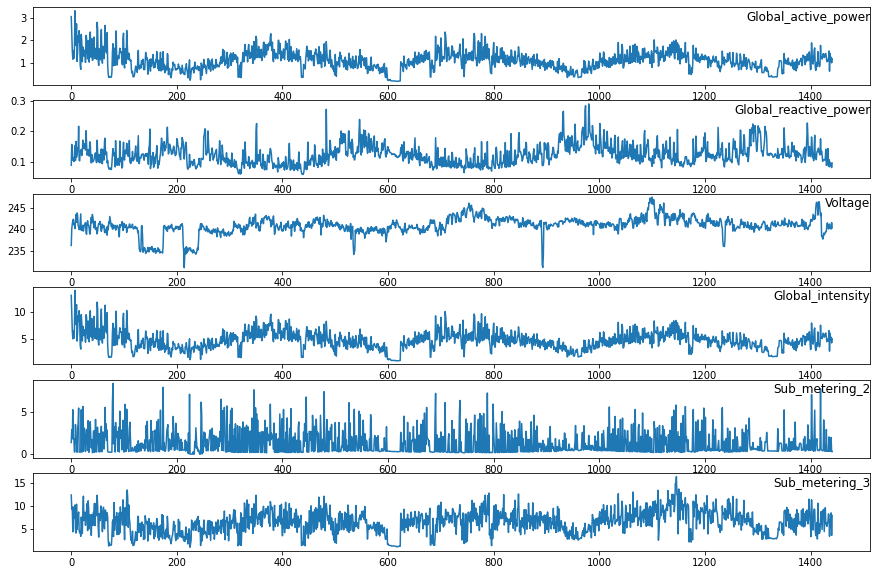

In [ ]:
# 下面我们比较对不同特征以天进行重采样的数值
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
# 统计以天进行重采样的平均值
values = df.resample('D').mean().values
# 对每个column进行绘图
plt.figure(figsize=(15, 10))
for group in groups:
    # 对每个特征添加子图
	plt.subplot(len(cols), 1, i)
    # 进行绘图
	plt.plot(values[:, group])
    # 添加标题
	plt.title(df.columns[group], y=0.75, loc='right')
    # 更换子图位置
	i += 1
plt.show()


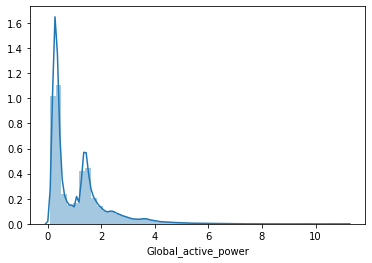

In [ ]:
# 下面我们看看 ‘Global_active_power‘ 数值分布情况
sns.distplot(df['Global_active_power']);
# 可以看出家庭消耗的总有功功率主要集中在 0-2kw 范围内

## Feature Correlation Analysis

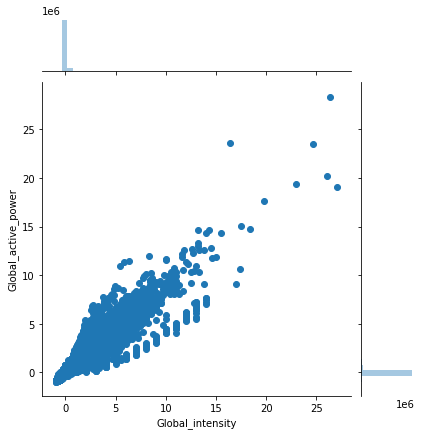

In [ ]:
# 查看 'Global_intensity' 和 'Global_active_power' 特征之间的关系
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  
plt.show()

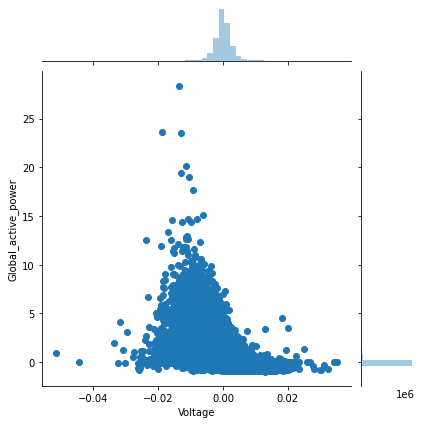

In [ ]:
# 查看 'Voltage' 和 'Global_active_power' 之间的关系
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()


The above figures tell us:
1. 'Global_intensity' & 'Global_active_power' is linearly related.
2. 'Voltage' & 'Global_active_power' is not that related.

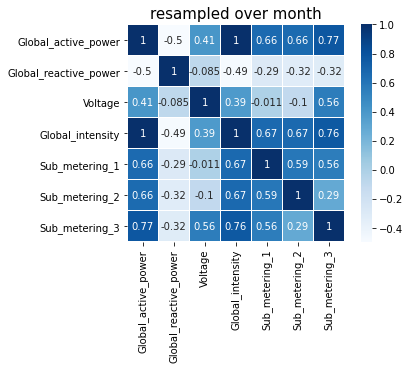

In [ ]:
# 对各特征按月进行聚合
plt.title('resampled over month',size=15)
sns.heatmap(df.resample('M').mean().corr(),linewidths=0.1,vmax=1.0, 
            square=True, 
            # cmap=plt.cm.RdBu,
            cmap='Blues',  
            linecolor='white', annot=True)

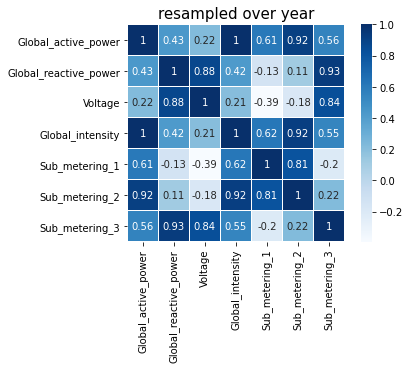

In [ ]:
# 对各特征按年进行聚合
plt.title('resampled over year',size=15)
sns.heatmap(df.resample('A').mean().corr(),linewidths=0.1,vmax=1.0, 
            square=True, 
            # cmap=plt.cm.RdBu,
            cmap='Blues', 
            linecolor='white', annot=True)

从上面可以看出，采用重采样技术可以改变特征之间的相关性， 这对于特征工程非常重要。



## use LSTM Forecast model

在可以使用深度学习之前，必须将时间序列预测问题调整为监督学习问题，形成输入和输出序列对，利用前一时间的 Global_active_power 和其他特征预测当前时间的 Global_active_power。

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# 下面我们对 ‘Global_active_power' 向前移动一个单位
df['Global_active_power'].resample('h').mean().shift(1)

dt
2006-12-16 17:00:00         NaN
2006-12-16 18:00:00    4.222889
2006-12-16 19:00:00    3.632200
2006-12-16 20:00:00    3.400233
2006-12-16 21:00:00    3.268567
                         ...   
2010-11-26 17:00:00    1.067933
2010-11-26 18:00:00    1.725900
2010-11-26 19:00:00    1.573467
2010-11-26 20:00:00    1.659333
2010-11-26 21:00:00    1.163700
Freq: H, Name: Global_active_power, Length: 34589, dtype: float64

In [ ]:
# 下面我们对 ‘Global_active_power' 向后移动一个单位
df['Global_active_power'].resample('h').mean().shift(-1)

dt
2006-12-16 17:00:00    3.632200
2006-12-16 18:00:00    3.400233
2006-12-16 19:00:00    3.268567
2006-12-16 20:00:00    3.056467
2006-12-16 21:00:00    2.200133
                         ...   
2010-11-26 17:00:00    1.573467
2010-11-26 18:00:00    1.659333
2010-11-26 19:00:00    1.163700
2010-11-26 20:00:00    0.934667
2010-11-26 21:00:00         NaN
Freq: H, Name: Global_active_power, Length: 34589, dtype: float64

In [ ]:
# 下面我们对 ‘Global_active_power' 向前移动一个单位
df['Global_active_power'].resample('h').mean().shift(1)
# 下面我们对 ‘Global_active_power' 向后移动一个单位
df['Global_active_power'].resample('h').mean().shift(-1)

dt
2006-12-16 17:00:00    3.632200
2006-12-16 18:00:00    3.400233
2006-12-16 19:00:00    3.268567
2006-12-16 20:00:00    3.056467
2006-12-16 21:00:00    2.200133
                         ...   
2010-11-26 17:00:00    1.573467
2010-11-26 18:00:00    1.659333
2010-11-26 19:00:00    1.163700
2010-11-26 20:00:00    0.934667
2010-11-26 21:00:00         NaN
Freq: H, Name: Global_active_power, Length: 34589, dtype: float64

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


因为这里我们预测 ‘Global_active_power' 不仅用到过去时间的 ‘Global_active_power' 还会用到其他的特征，比如：'Voltage‘，这时候我们把此类问题叫做多变量时间序列预测。
f(power ,t) = f(power, t-1) + f(other features, t)

下面我们展示将时间序列问题转换为监督学习问题的过程。

In [ ]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]     # there are 7(here data.shape[1]=7) variables recorded at each time.
	dff = pd.DataFrame(data)   #2075259 rows × 7 columns, while the col names are [0,1,2,3,4,5,6]. Column 0 is the target we want to predict.
	cols, names = list(), list()   
	# 输入序列(t-n, ... t-1)
	for i in range(n_in, 0, -1): 
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# 预测序列 (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# 组合起来
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# 丢掉NaN
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# 它包含4个参数:
# - data: 观测序列。格式是一个 list 或 2维 Numpy Array   required
# - n_in: 观测数据input(X)的步长，范围[1, len(data)], 默认为1
# - n_out: 观测数据output(y)的步长， 范围为[0, len(data)-1], 默认为1
# - dropnan: 是否删除存在NaN的行，默认为True
# 它的返回值只有一个, 即转型后适用于监督学习的 DataFrame
# https://blog.csdn.net/qq_30219017/article/details/79539376

我们将数据以小时进行聚合，这样也可以减少计算时间，可以快速获得测试模型的结果。 我们以小时进行聚合（原始数据以分钟为单位）。这将把数据大小从 2075259 减少到 34589，但依然保持数据的整体结构。

In [ ]:
# 将数据按小时聚合
df_resample = df.resample('h').mean() 
df_resample.shape


(34589, 7)

## Normalize features

数据归一化处理是数据挖掘的一项基础工作。不同指标往往具有不同的量纲，数值间的差别可能很大，不进行处理可能会影响数据分析的结果。为了消除指标间的量纲和取值范围差异的影响，需要进行标准化处理，将数据按照比例进行缩放，使之落入特定的区域，以便于进行综合分析。
同样我们必须对用户电量的各指标进行处理，这里我们用到最小最大规范化。

In [ ]:
# 把所有特征进行规范化
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values 
# 特征归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 转化为监督问题
reframed = series_to_supervised(scaled, 1, 1)
# 删除不需要的特征
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.335501  ...   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.283802  ...   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.315987  ...   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.434417  ...   0.008973   0.798917  0.322555

[5 rows x 8 columns]


我们将前三年的数据作为训练集，后一年的样本作为测试集，并将数据改为 3 维格式。

In [ ]:
values = reframed.values
values[:5,:].shape[1]

8

In [ ]:
# 对样本集拆分成训练集和测试集
values = reframed.values
n_train_time = 365*24*3
train = values[:n_train_time, :]   # return the first n rows with all columns
test = values[n_train_time:, :]
train_X, train_y = train[:, :-1], train[:, -1]   # all the features except the last column
test_X, test_y = test[:, :-1], test[:, -1]
# 把数据转换为3维
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(26280, 1, 7) (26280,) (8308, 1, 7) (8308,)


搭建 LSTM 模型
模型架构1）LSTM 在第一个可见层中有 100 个神经元2）丢弃 20％，防止过拟合3）输出层中 1 个神经元，用于预测 Global_active_power4）使用平均绝对误差（MAE）损失函数和随机梯度下降的 Adam 优化器5）该模型 epoch 为 20，批次大小为 70


Using TensorFlow backend.


Train on 26280 samples, validate on 8308 samples
Epoch 1/20
 - 4s - loss: 0.0133 - val_loss: 0.0083
Epoch 2/20
 - 2s - loss: 0.0098 - val_loss: 0.0079
Epoch 3/20
 - 2s - loss: 0.0095 - val_loss: 0.0080
Epoch 4/20
 - 2s - loss: 0.0095 - val_loss: 0.0079
Epoch 5/20
 - 2s - loss: 0.0094 - val_loss: 0.0079
Epoch 6/20
 - 2s - loss: 0.0094 - val_loss: 0.0079
Epoch 7/20
 - 2s - loss: 0.0094 - val_loss: 0.0079
Epoch 8/20
 - 2s - loss: 0.0094 - val_loss: 0.0079
Epoch 9/20
 - 2s - loss: 0.0094 - val_loss: 0.0079
Epoch 10/20
 - 2s - loss: 0.0093 - val_loss: 0.0079
Epoch 11/20
 - 2s - loss: 0.0093 - val_loss: 0.0079
Epoch 12/20
 - 2s - loss: 0.0093 - val_loss: 0.0079
Epoch 13/20
 - 2s - loss: 0.0093 - val_loss: 0.0078
Epoch 14/20
 - 2s - loss: 0.0093 - val_loss: 0.0079
Epoch 15/20
 - 2s - loss: 0.0093 - val_loss: 0.0078
Epoch 16/20
 - 2s - loss: 0.0093 - val_loss: 0.0079
Epoch 17/20
 - 2s - loss: 0.0093 - val_loss: 0.0078
Epoch 18/20
 - 2s - loss: 0.0093 - val_loss: 0.0078
Epoch 19/20
 - 2s - loss

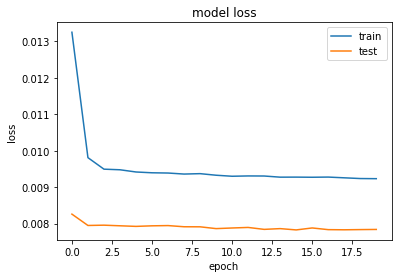

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


# 搭建网络模型
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# 训练网络
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 统计 loss 值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# 做出预测
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))


我们可以看出模型的收敛速度很快。


第五步 模型评估

预测模型对训练集进行预测而得到的准确率并不能很好地反映预测模型对未来的性能，为了有效判断一个预测模型的性能表现，需要一组没有参加预测模型建立的数据集，并在该模型上评价预测模型的准确率，这组独立的数据集叫做测试集。在测试集进行预测并且评估，我们怎样对模型进行性能衡量？

回归问题的评价指标:通常用相对／绝对误差，平均绝对误差，均方误差，均方根误差等指标来衡量,分类问题的评价指标：准确率，精确率，召回率，ROC曲线，混淆矩阵。

我们将预测与测试数据集相结合，并反演缩放。以预测值和实际值为原始尺度，我们可以计算模型的误差分数。 在这种情况下，我们计算出与变量本身相同的单位产生误差的均方根误差（RMSE)。

In [ ]:
from sklearn.metrics import mean_squared_error

#对预测值进行反演缩放
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 对真实值进行反演缩放
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 计算 RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.570


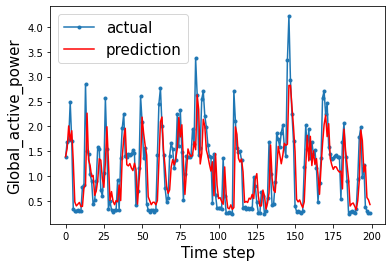

In [ ]:
## 我们比较下 200 小时真实值和预测值 
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()


第六步 思考，如何进一步的改进模型？
1.在缺失值处理中利用其他的插值方法
2.使用复杂的模型
3.调整 epoch 和 batch_size

第七步 总结
1. 对数据进行预处理，处理缺失值；
2. 进行数据可视化，了解数据的结构和相关性
3. 搭建 LSTM 模型，其中最为关键的是将问题转化为监督学习问题；
4. 我们对模型进行评估，并提出了优化模型的建议。

使用此模型同样也可以预测温湿度和股价等等

Notes：

https://juejin.im/post/5cdeaacfe51d45109b01b0e6


https://machinelearningmastery.com/how-to-develop-an-autoregression-forecast-model-for-household-electricity-consumption/


https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
